# import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Setup Environment

In [2]:
img_size= (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30

# Load Image data

In [3]:
directory="D:/rice_disease_detection/dataset/Original_dataset"

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(directory=directory,
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=img_size,
                                                  seed=seed,
                                                  validation_split=0.3,
                                                  subset='training',
                                                  )

Found 16786 files belonging to 10 classes.
Using 11751 files for training.


In [5]:
val_data = tf.keras.utils.image_dataset_from_directory(directory=directory,
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=img_size,
                                                  seed=seed,
                                                  validation_split=0.3,
                                                  subset='validation',
                                                  )

Found 16786 files belonging to 10 classes.
Using 5035 files for validation.


In [19]:
class_names = train_data.class_names
class_names

['Bacterial Blight',
 'Blast',
 'Brown Spot',
 'Healthy Rice',
 'Leaf Blast',
 'Leaf Scald',
 'Narrow Brown Leaf Spot',
 'Rice Hispa',
 'Sheath Blight',
 'Tungro']

# Rescale Images

In [5]:
# Apply rescaling using the Rescaling layer
train_data=train_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
val_data=val_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Create Model

In [6]:
# Define Model

model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

d:\rice_disease_detection\rice_disease_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,472 (2.57 MB)

 Trainable params: 674,472 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [7]:
# Define the model with optimizer , loss , metrics
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.001,
    mode='max',
    verbose=1
)

In [9]:
history = model.fit(train_data,
                    epochs=50,
                    validation_data=val_data,
                    callbacks=[early_stopping],
                    verbose=1,
                    shuffle=True)

Epoch 1/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 540s 1s/step - accuracy: 0.2958 - loss: 1.8494 - val_accuracy: 0.4820 - val_loss: 1.4382
Epoch 2/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 90s 244ms/step - accuracy: 0.5023 - loss: 1.3353 - val_accuracy: 0.6574 - val_loss: 0.9529
Epoch 3/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 91s 246ms/step - accuracy: 0.6358 - loss: 0.9844 - val_accuracy: 0.7122 - val_loss: 0.7832
Epoch 4/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 81s 218ms/step - accuracy: 0.7129 - loss: 0.8086 - val_accuracy: 0.7448 - val_loss: 0.7047
Epoch 5/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 75s 202ms/step - accuracy: 0.7657 - loss: 0.6620 - val_accuracy: 0.8103 - val_loss: 0.5209
Epoch 6/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 75s 203ms/step - accuracy: 0.8036 - loss: 0.5497 - val_accuracy: 0.7303 - val_loss: 0.7670
Epoch 7/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 75s 203ms/step - accuracy: 0.8037 - loss: 0.5550 - val_accuracy: 0.8586 - val_loss: 0.4261
Epoch 8/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 78s 212ms/step - accuracy: 0.8562 - loss: 0.4

# Evaluate Model's Performance

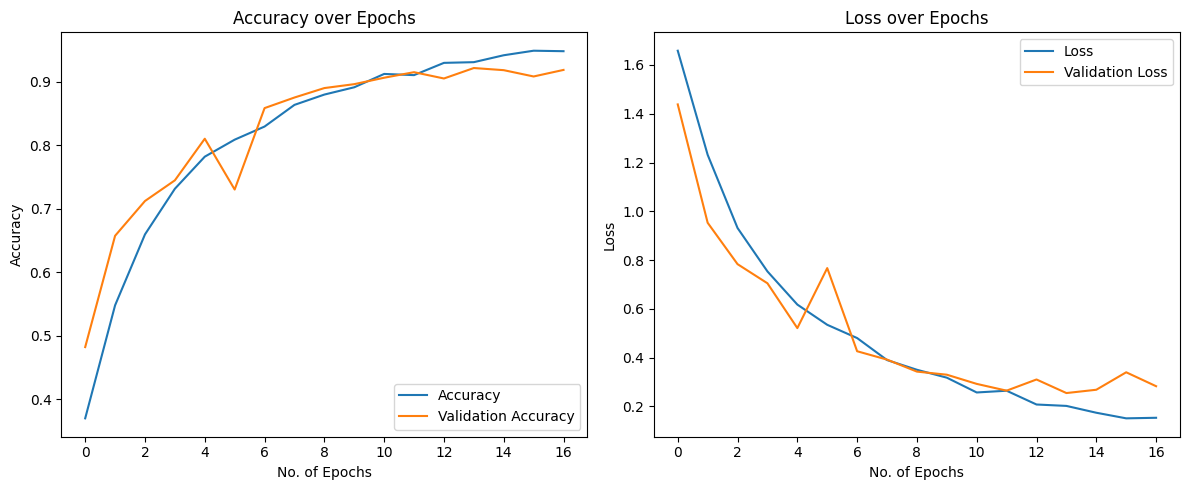

In [10]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy over Epochs")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Loss over Epochs")

plt.tight_layout()
plt.show()


In [11]:
# print Accuracy

test_Accuracy = model.evaluate(val_data)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9190 - loss: 0.2809
Model's Accuracy : 91.87686443328857


# Best Wieghts

In [12]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_weights = model.get_weights()

print(f"Best weights were obtained at epoch {best_epoch}")
print("Best Weights:", best_weights)

Best weights were obtained at epoch 14
Best Weights: [array([[[[ 0.02576211, -0.1612059 , -0.14115801, -0.07984252,
           0.03425892,  0.13088009,  0.23211403, -0.18469028,
          -0.10185374, -0.18839003,  0.02219575, -0.03043329,
           0.15193179, -0.10432176, -0.1737079 , -0.12536503],
         [-0.14825885, -0.13191308,  0.1661437 ,  0.08079042,
          -0.15633354, -0.21881951, -0.13222863,  0.11384122,
          -0.13199049, -0.12020256, -0.0724864 ,  0.18070449,
          -0.09789237, -0.13148297,  0.00621564,  0.02640715],
         [ 0.16472404,  0.02376845, -0.15887962, -0.07843339,
           0.10868202, -0.06723914, -0.03153686,  0.05782152,
          -0.22028585,  0.25271723, -0.03680731, -0.21736611,
          -0.18074766, -0.15357397,  0.16444288,  0.0892981 ]],

        [[ 0.14962071,  0.02869239, -0.00568632, -0.06059451,
          -0.17957655, -0.09258797, -0.0429839 ,  0.13601871,
           0.16055158, -0.16493833,  0.20838094, -0.09992041,
           

# Checking Labels

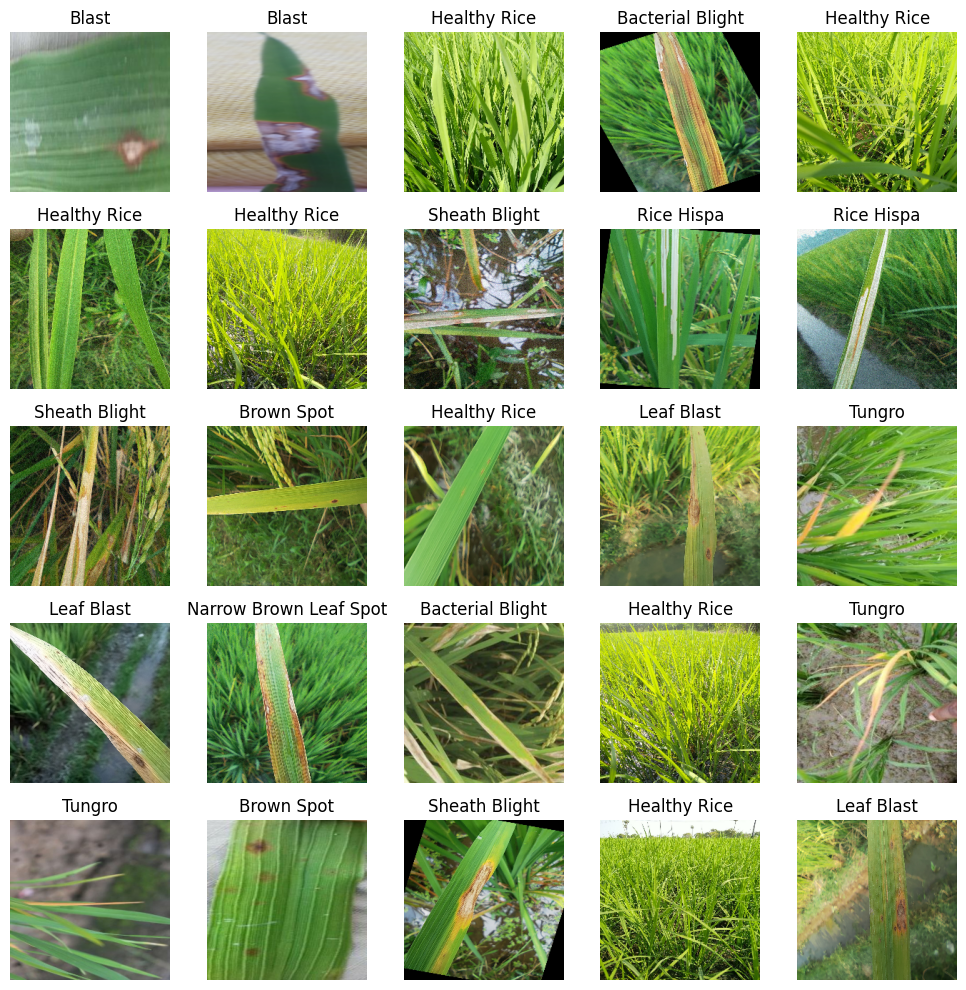

In [ ]:
plt.figure(figsize=(10,10))
for images , labels in train_data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

In [20]:
class_indices = {index: name for index, name in enumerate(class_names)}

In [21]:
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [ ]:
# model.save("model/rice_model_new.h5")